In [3]:
import sys 
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#
# setup MIDAS env equivalent to source setup.sh for jupyter
# waring rispetto all'sh il $ non definisce varibili globali che vanno definite come strighe
#
DAQ_IN_DIR='/home/cygno/DAQ/online'
%set_env MIDAS_EXPTAB=$DAQ_IN_DIR/exptab
%set_env MIDAS_EXPT_NAME=CYGNUS_RD

%set_env MYDRIVER_DIR=$DAQ_IN_DIR/mydrivers

CAENVME='/usr/local/CAEN/CAENVMELib-2.50'
%set_env CAENVME_INCDIR=$CAENVME/include
%set_env CAENVME_LIBDIR=$CAENVME/lib/x64

CAENHV='/usr/local/CAEN/CAENHVWrapper-5.82'
%set_env CAENHV_INCDIR=$CAENHV/include
%set_env CAENHV_LIBDIR=$CAENHV/lib/x64

%set_env ETHERNET_INCDIR=$DAQ_IN_DIR/mydrivers/ethernet
%set_env CAMERA_INCDIR=/usr/local/dcamsdk4/inc
%set_env CAMERA_LIBDIR=/usr/local/lib


env: MIDAS_EXPTAB=/home/cygno/DAQ/online/exptab
env: MIDAS_EXPT_NAME=CYGNUS_RD
env: MYDRIVER_DIR=/home/cygno/DAQ/online/mydrivers
env: CAENVME_INCDIR=/usr/local/CAEN/CAENVMELib-2.50/include
env: CAENVME_LIBDIR=/usr/local/CAEN/CAENVMELib-2.50/lib/x64
env: CAENHV_INCDIR=/usr/local/CAEN/CAENHVWrapper-5.82/include
env: CAENHV_LIBDIR=/usr/local/CAEN/CAENHVWrapper-5.82/lib/x64
env: ETHERNET_INCDIR=/home/cygno/DAQ/online/mydrivers/ethernet
env: CAMERA_INCDIR=/usr/local/dcamsdk4/inc
env: CAMERA_LIBDIR=/usr/local/lib


Press Enter to continue...
Event # 10 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 146


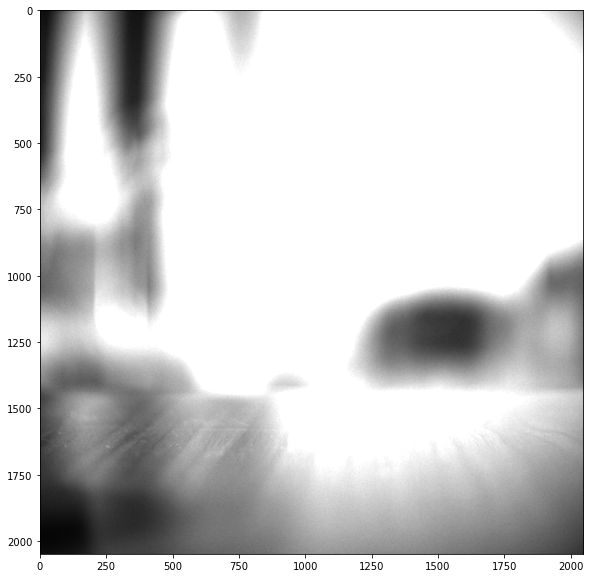

None

In [11]:
import midas.file_reader
from IPython import display

# Open our file
mfile = midas.file_reader.MidasFile("/media/cygno/data/run99999.mid.gz")

# We can simply iterate over all events in the file
for event in mfile:
    try:
        if event.header.is_midas_internal_event():
            print("Saw a special event")
            continue

        bank_names = ", ".join(b.name for b in event.banks.values())
        print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))

        for bank_name, bank in event.banks.items():
            # bank.data is generally a python tuple.
            #
            # If use_numpy=True was specified when opening the MidasFile, then
            # bank.data is a numpy array.
            if len(bank.data):
                print("    The first entry in bank %s is %s" % (bank_name, bank.data[0]))
                if bank_name == 'CAM0':
                    shape = int(event.banks['CAM0'].size_bytes/2**12)
                    image = np.reshape(event.banks['CAM0'].data, (shape, shape))
                    fig = plt.figure(figsize=(10,10))
                    plt.imshow(image, cmap='gray', vmin=95, vmax=1000)
                    display.display(plt.show())
                    display.clear_output(wait=True)
        input("Press Enter to continue...")

    except KeyboardInterrupt:
        break

In [12]:
import midas.file_reader
from datetime import datetime


# Open our file
mfile = midas.file_reader.MidasFile("/media/cygno/data/run99999.mid.gz")

# We can simply iterate over all events in the file
for event in mfile:
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    #print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))

    for bank_name, bank in event.banks.items():
        # bank.data is generally a python tuple.
        #
        # If use_numpy=True was specified when opening the MidasFile, then
        # bank.data is a numpy array.
        if bank_names=='INPT':
            print(datetime.utcfromtimestamp(event.header.timestamp).strftime('%Y-%m-%d %H:%M:%S'), 
                  "event: "+str(event.header.serial_number))
            print("  >>>  Entry in bank %s is %s" % (bank_name, bank.data))
            #print(event.dump())

            break


Saw a special event
2022-01-31 13:18:28 event: 0
  >>>  Entry in bank INPT is (20.652938842773438, 0.9790525436401367, 1.0101854801177979, 13.779716491699219, 0.0007560127414762974, 0.0006671063601970673, 0.0006922869943082333, 0.0006818794645369053, 0.0, 1.8609933853149414, 2.6696105003356934, 1.9184566736221313, 1.5243370532989502, -0.7958415746688843, 0.9193491339683533, -0.03381827101111412, -0.15201149880886078, 0.0, -0.0011660391464829445, -0.001127319410443306, -0.001161347609013319, -0.0012060743756592274, -0.0011544907465577126, -0.0011309981346130371, -0.0011428259313106537, -0.0011717784218490124, 0.0)
2022-01-31 13:19:28 event: 1
  >>>  Entry in bank INPT is (20.66020965576172, 0.9790388345718384, 1.2661314010620117, 13.77970027923584, 0.0006927992217242718, 0.0006170012056827545, 0.0006047775968909264, 0.000618083868175745, 0.0, 1.8622844219207764, 2.669431686401367, 1.9186720848083496, 1.5245190858840942, -0.7959316968917847, 0.9194932579994202, -0.033823899924755096, -0.

In [114]:
import midas.file_reader


# Open our file
mfile = midas.file_reader.MidasFile("/media/cygno/data/run99999.mid.gz")

# We can simply iterate over all events in the file
for event in mfile:
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))

    for bank_name, bank in event.banks.items():
        # bank.data is generally a python tuple.
        #
        # If use_numpy=True was specified when opening the MidasFile, then
        # bank.data is a numpy array.
        if len(bank.data):
            print("    The first entry in bank %s is %s" % (bank_name, bank.data[0]))


Saw a special event
Event # 0 of type ID 3 contains banks DMND, MSRD, CRNT, STAT, TPTR
    The first entry in bank DMND is 10.0
    The first entry in bank MSRD is 0.0
    The first entry in bank CRNT is 0.0
    The first entry in bank STAT is 128
    The first entry in bank TPTR is 0.0
Event # 0 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 133
Event # 1 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 134
Event # 2 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 165
Event # 3 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 134
Event # 4 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 151
Event # 5 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 141
Event # 6 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 117
Event # 7 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 141
Event # 8 of type ID 1 contains banks CAM0
    T

Event # 95 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 125
Event # 96 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 149
Event # 97 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 128
Event # 98 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 155
Event # 99 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 151
Event # 100 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 129
Event # 101 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 149
Event # 102 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 115
Event # 103 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 143
Event # 104 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 149
Event # 105 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 143
Event # 106 of type ID 1 contains banks CAM0
    The first entry in ba

Event # 188 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 116
Event # 189 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 151
Event # 190 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 119
Event # 191 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 115
Event # 192 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 134
Event # 193 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 142
Event # 194 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 130
Event # 195 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 142
Event # 196 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 139
Event # 197 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 142
Event # 198 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 147
Event # 199 of type ID 1 contains banks CAM0
    The first entry 

Event # 285 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 151
Event # 286 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 146
Event # 287 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 135
Event # 288 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 133
Event # 289 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 125
Event # 290 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 138
Event # 291 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 162
Event # 292 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 150
Event # 293 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 139
Event # 294 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 135
Event # 295 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 112
Event # 296 of type ID 1 contains banks CAM0
    The first entry 

In [5]:
# test from jupyter 
import midas.client

"""
A simple example program that connects to a midas experiment,
reads an ODB value, then sets an ODB value.

Expected output is:

```
The experiment is currently stopped
The new value of /pyexample/eg_float is 5.670000
```
"""

if __name__ == "__main__":
    client = midas.client.MidasClient("pytest")

    # Read a value from the ODB. The return value is a normal python
    # type (an int in this case, but could also be a float, string, bool,
    # list or dict).
    state = client.odb_get("/Runinfo/State")

    if state == midas.STATE_RUNNING:
        print("The experiment is currently running")
    elif state == midas.STATE_PAUSED:
        print("The experiment is currently paused")
    elif state == midas.STATE_STOPPED:
        print("The experiment is currently stopped")
    else:
        print("The experiment is in an unexpected run state")

The experiment is currently running


In [6]:
client.odb_get("/Runinfo/")
#client.odb_get("/Experiment/MAX_EVENT_SIZE")
client.odb_get("/Logger")

OrderedDict([('Data dir', '/media/cygno/data'),
             ('Message file date format', ''),
             ('Message dir', ''),
             ('Write data', False),
             ('ODB Dump', False),
             ('ODB Dump File', 'run%05d.json'),
             ('ODB Last Dump File', 'last.json'),
             ('Auto restart', False),
             ('Auto restart delay', 0),
             ('Tape message', True),
             ('Channels',
              OrderedDict([('0',
                            OrderedDict([('Settings',
                                          OrderedDict([('Active', True),
                                                       ('Type', 'Disk'),
                                                       ('Filename',
                                                        'run%05d.mid'),
                                                       ('Format', 'MIDAS'),
                                                       ('Compression', 1),
                                      

In [15]:
client.odb_get("/System/Buffers/SYSTEM")

OrderedDict([('Size', 33554432),
             ('Write pointer', 7102208),
             ('Read pointer', 15490696),
             ('Filled', 25165944),
             ('Filled pct', 75.00035762786865),
             ('Clients',
              OrderedDict([('ODBEdit',
                            OrderedDict([('count_lock', 2),
                                         ('count_sent', 0),
                                         ('bytes_sent', 0),
                                         ('count_write_wait', 0),
                                         ('time_write_wait', '0x00000000'),
                                         ('max_bytes_write_wait', 0),
                                         ('count_read', 0),
                                         ('bytes_read', 0),
                                         ('get_all_flag', False),
                                         ('read_pointer', 0),
                                         ('bytes_used', 0),
                                      

In [16]:
value = client.odb_get("/Equipment/")
for key in value:
    print(key, "->", value[key])

HV -> OrderedDict([('Common', OrderedDict([('Event ID', '0x0003'), ('Trigger mask', '0x0000'), ('Buffer', 'SYSTEM'), ('Type', 16), ('Source', 0), ('Format', 'MIDAS'), ('Enabled', True), ('Read on', 255), ('Period', 60000), ('Event limit', 0), ('Num subevents', '0x00000000'), ('Log history', 1), ('Frontend host', 'localhost'), ('Frontend name', 'SC Frontend'), ('Frontend file name', '/home/cygno/DAQ/online/scfe.cxx'), ('Status', 'Ok'), ('Status color', 'greenLight'), ('Hidden', False), ('Write cache size', 0)])), ('Variables', OrderedDict([('Demand', [10, 0, 2, 0, 400, 0, 1400, 0, 0, 0, 0, 50, 600, 0, 0, 0, 0, 0, 0, 770, 935, 825, 935, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 350, 500, 350, 650, 350, 200, 0, 0, 0, 0, 0, 0, 0, 10, 440, 500, 440, 500, 440, 840, 0, 0, 0, 0, 0, 0, 0]), ('Measured', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.75, 0.75, 0, 0, 0, 0, 0.75, 0, 0.25, 0, 0, 0.5, 0, 0, 0.75, 0.25, 1, 0.25, 0, 0.5, 0.5, 0.5, 0.25, 0.14, 0.12, 0.059999999, 0.2, 0.18000001, 0.039999

In [17]:
value = client.odb_get("/Equipment/Environment/Settings/")
for key in value:
    print(key, "->", value[key])

Devices -> OrderedDict([('Input', OrderedDict([('Device', 'mscb399'), ('Pwd', 'meg'), ('MSCB Address', [65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535]), ('MSCB Index', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), ('Enabled', True), ('Debug', False), ('Retries', 10)])), ('Output', OrderedDict([('Enabled', True)]))])
Update Threshold -> [0.0099999998, 0.001, 0.15000001, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Input Offset -> [100, 0.40000001, 2.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Input Factor -> [12.5, 0.1, 0.625, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Names Input -> ['P0IIn0', 'P0IIn1', 'P0IIn2', 'P0IIn3', 'P0IIn4', 'P0IIn5', 'P0IIn6', 'P0IIn7

In [7]:
client.odb_get("/Equipment/Environment/Settings/Names Input")

['P0IIn0',
 'P0IIn1',
 'P0IIn2',
 'P0IIn3',
 'P0IIn4',
 'P0IIn5',
 'P0IIn6',
 'P0IIn7',
 'P0Calib',
 'P1UIn0',
 'P1UIn1',
 'P1UIn2',
 'P1UIn3',
 'P1UIn4',
 'P1UIn5',
 'P1UIn6',
 'P1UIn7',
 'P1Calib',
 'P3IIn0',
 'P3IIn1',
 'P3IIn2',
 'P3IIn3',
 'P3IIn4',
 'P3IIn5',
 'P3IIn6',
 'P3IIn7',
 'P3Calib']

In [1]:
#
# setup MIDAS env equivalent to source setup.sh for jupyter
# waring rispetto all'sh il $ non definisce varibili globali che vanno definite come strighe
#
DAQ_IN_DIR='/home/cygno/DAQ/online'
%set_env MIDAS_EXPTAB=$DAQ_IN_DIR/exptab
%set_env MIDAS_EXPT_NAME=CYGNUS_RD

%set_env MYDRIVER_DIR=$DAQ_IN_DIR/mydrivers

CAENVME='/usr/local/CAEN/CAENVMELib-2.50'
%set_env CAENVME_INCDIR=$CAENVME/include
%set_env CAENVME_LIBDIR=$CAENVME/lib/x64

CAENHV='/usr/local/CAEN/CAENHVWrapper-5.82'
%set_env CAENHV_INCDIR=$CAENHV/include
%set_env CAENHV_LIBDIR=$CAENHV/lib/x64

%set_env ETHERNET_INCDIR=$DAQ_IN_DIR/mydrivers/ethernet
%set_env CAMERA_INCDIR=/usr/local/dcamsdk4/inc
%set_env CAMERA_LIBDIR=/usr/local/lib

client.disconnect()

env: MIDAS_EXPTAB=/home/cygno/DAQ/online/exptab
env: MIDAS_EXPT_NAME=CYGNUS_RD
env: MYDRIVER_DIR=/home/cygno/DAQ/online/mydrivers
env: CAENVME_INCDIR=/usr/local/CAEN/CAENVMELib-2.50/include
env: CAENVME_LIBDIR=/usr/local/CAEN/CAENVMELib-2.50/lib/x64
env: CAENHV_INCDIR=/usr/local/CAEN/CAENHVWrapper-5.82/include
env: CAENHV_LIBDIR=/usr/local/CAEN/CAENHVWrapper-5.82/lib/x64
env: ETHERNET_INCDIR=/home/cygno/DAQ/online/mydrivers/ethernet
env: CAMERA_INCDIR=/usr/local/dcamsdk4/inc
env: CAMERA_LIBDIR=/usr/local/lib


NameError: name 'client' is not defined

In [ ]:
"""
A simple client that registers to receive events from midas.
"""

from matplotlib import pyplot as plt
import numpy as np
import os


import midas
import midas.client

if __name__ == "__main__":
    # Create our client
    client = midas.client.MidasClient("pytest")
    
    # Define which buffer we want to listen for events on (SYSTEM is the 
    # main midas buffer).
    buffer_handle = client.open_event_buffer("SYSTEM",None,1000000000)
    
    # Request events from this buffer that match certain criteria. In this
    # case we will only be told about events with an "event ID" of 14.
    #request_id = client.register_event_request(buffer_handle, event_id = 1)

    while True:
        # If there's an event ready, `event` will contain a `midas.event.Event`
        # object. If not, it will be None. If you want to block waiting for an
        # event to arrive, you could set async_flag to False.
        event = client.receive_event(buffer_handle, async_flag=True)

        if event is not None:

            bank_names = ", ".join(b.name for b in event.banks.values())
            print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))

            for bank_name, bank in event.banks.items():
                # bank.data is generally a python tuple.
                #
                # If use_numpy=True was specified when opening the MidasFile, then
                # bank.data is a numpy array.
                if len(bank.data):
                    print("    The first entry in bank %s is %s" % (bank_name, bank.data[0]))
                    if bank_name == 'CAM0':
                        shape = int(event.banks['CAM0'].size_bytes/2**12)
                        image = np.reshape(event.banks['CAM0'].data, (shape, shape))
                        fig = plt.figure(figsize=(10,10))
                        plt.imshow(image, cmap='gray', vmin=95, vmax=1000)
                        display.display(plt.show())
                        display.clear_output()

        # Talk to midas so it knows we're alive, or can kill us if the user
        # pressed the "stop program" button.
        #client.communicate(10)
        
#     # You don't have to cancel the event request manually (it will be done
#     # automatically when the program exits), but for completeness we're just
#     # showing that such a function exists.
#     client.deregister_event_request(buffer_handle, request_id)
#     plt.show()
    

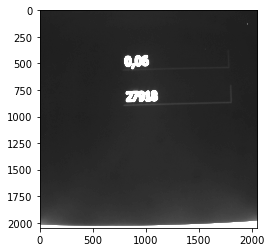

226
Midas shutdown


NameError: name 'exit' is not defined

In [2]:
"""
A simple client that registers to receive events from midas.
"""
from IPython import display

from matplotlib import pyplot as plt
import numpy as np
import os


import midas
import midas.client

if __name__ == "__main__":
    # Create our client
    client = midas.client.MidasClient("pytest")
    
    # Define which buffer we want to listen for events on (SYSTEM is the 
    # main midas buffer).
    buffer_handle = client.open_event_buffer("SYSTEM",None,1000000000)
    
    # Request events from this buffer that match certain criteria. In this
    # case we will only be told about events with an "event ID" of 14.
    request_id = client.register_event_request(buffer_handle, event_id = 1)
    
    while True:
        try:
            # If there's an event ready, `event` will contain a `midas.event.Event`
            # object. If not, it will be None. If you want to block waiting for an
            # event to arrive, you could set async_flag to False.
            event = client.receive_event(buffer_handle, async_flag=True)

            if event is not None:

                shape = int(event.banks['CAM0'].size_bytes/2**12)
                image = np.reshape(event.banks['CAM0'].data, (shape, shape))

                plt.imshow(image, cmap='gray', vmin=95, vmax=1000)

                plt.pause(1)

                print(event.banks['CAM0'].data[1000])
                # Print some information to screen about this event.
                #bank_names = ", ".join(b.name for b in event.banks)
                #print("Received event with timestamp %s containing banks %s" % (event.header.timestamp, bank_names))

            # Talk to midas so it knows we're alive, or can kill us if the user
            # pressed the "stop program" button.
            client.communicate(10)
            display.display(plt.show())
            display.clear_output()
        except KeyboardInterrupt:
            # You don't have to cancel the event request manually (it will be done
            # automatically when the program exits), but for completeness we're just
            # showing that such a function exists.
            client.deregister_event_request(buffer_handle, request_id)
            # Disconnect from midas before we exit.
            client.disconnect()
            break
        



    

                            